In [6]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1002. Ecig Metabolomics NELF/P1002.3. Analyses/P1002.3.4. ML Visualizations/P1002.3.4.2 Decision Boundary Plot/Input')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1002. Ecig Metabolomics NELF/P1002.3. Analyses/P1002.3.4. ML Visualizations/P1002.3.4.2 Decision Boundary Plot/Output')
cur_date = "041222"

library(readxl)
library(tidyverse)
library(randomForest)
library(gganimate)
library(mvnfast)
library(MetBrewer)

#reading in file
molecular_feature_df_w_Ecig_40 = read_csv("20220217_mf_qrilc_w40.csv") %>%
     rename(Smoking_Status = sample)

Rows: 59 Columns: 3873
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (1): sample
dbl (3872): MF_2, MF_3, MF_4, MF_5, MF_6, MF_7, MF_11, MF_12, MF_13, MF_14, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
head(molecular_feature_df_w_Ecig_40)

Smoking_Status,MF_2,MF_3,MF_4,MF_5,MF_6,MF_7,MF_11,MF_12,MF_13,⋯,MF_62853,MF_63431,MF_63701,MF_64025,MF_64936,MF_65532,MF_68286,MF_73340,MF_77165,MF_78976
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NS_070,19.86186,17.86943,19.21394,18.02809,17.46636,18.34174,18.41799,19.31361,19.46777,⋯,19.06974,19.10260,17.17255,16.92465,17.09794,19.06203,19.13556,16.93182,17.55702,17.05593
NS_110,21.08622,22.58769,21.05378,17.93584,17.33098,20.41479,20.37485,21.12876,21.01488,⋯,18.02560,17.82667,19.37426,16.23450,19.06421,18.06379,19.39103,16.72112,19.27343,19.30881
NS_143,13.12099,14.44659,13.46827,16.51009,14.93820,15.66299,15.72731,13.78698,15.18975,⋯,19.14095,19.02411,19.56175,17.17120,16.97302,19.49121,17.09470,15.56214,19.55038,19.54912
NS_152,21.60361,23.22761,21.99010,16.22547,17.59020,21.53908,21.14531,22.07857,21.97502,⋯,19.28751,19.54886,16.78848,16.46750,19.47635,19.44477,16.99617,16.09531,19.28810,19.32788
NS_187,19.43885,17.93876,19.68977,16.73360,17.88844,17.81758,17.64979,19.64269,19.32233,⋯,16.70042,17.85969,18.97406,18.18813,18.50336,19.19085,19.41757,16.88993,19.35678,18.95550
NS_196,22.53459,24.36662,22.77595,16.69956,16.38411,22.55912,17.30008,22.80146,22.09338,⋯,16.86999,15.82637,19.46467,16.97149,17.46699,16.32598,15.62938,17.37207,15.84334,17.82000


In [9]:
#first making smoking status column binary denoted by 0 = non smoker and 1 = ecig user
molecular_feature_df_w_Ecig_40 = molecular_feature_df_w_Ecig_40 %>%
    #grepl is synonymous with "contains"
    #necessary to put it into factor and relevel, so algorithm understands which data is considered baseline
    mutate(Smoking_Status = relevel(factor(ifelse(grepl("Ecig", Smoking_Status), 1, 0)), ref = "0"))

head(molecular_feature_df_w_Ecig_40)

Smoking_Status,MF_2,MF_3,MF_4,MF_5,MF_6,MF_7,MF_11,MF_12,MF_13,⋯,MF_62853,MF_63431,MF_63701,MF_64025,MF_64936,MF_65532,MF_68286,MF_73340,MF_77165,MF_78976
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,19.86186,17.86943,19.21394,18.02809,17.46636,18.34174,18.41799,19.31361,19.46777,⋯,19.06974,19.10260,17.17255,16.92465,17.09794,19.06203,19.13556,16.93182,17.55702,17.05593
0,21.08622,22.58769,21.05378,17.93584,17.33098,20.41479,20.37485,21.12876,21.01488,⋯,18.02560,17.82667,19.37426,16.23450,19.06421,18.06379,19.39103,16.72112,19.27343,19.30881
0,13.12099,14.44659,13.46827,16.51009,14.93820,15.66299,15.72731,13.78698,15.18975,⋯,19.14095,19.02411,19.56175,17.17120,16.97302,19.49121,17.09470,15.56214,19.55038,19.54912
0,21.60361,23.22761,21.99010,16.22547,17.59020,21.53908,21.14531,22.07857,21.97502,⋯,19.28751,19.54886,16.78848,16.46750,19.47635,19.44477,16.99617,16.09531,19.28810,19.32788
0,19.43885,17.93876,19.68977,16.73360,17.88844,17.81758,17.64979,19.64269,19.32233,⋯,16.70042,17.85969,18.97406,18.18813,18.50336,19.19085,19.41757,16.88993,19.35678,18.95550
0,22.53459,24.36662,22.77595,16.69956,16.38411,22.55912,17.30008,22.80146,22.09338,⋯,16.86999,15.82637,19.46467,16.97149,17.46699,16.32598,15.62938,17.37207,15.84334,17.82000


In [11]:
#random forest model
df1 = data.frame(molecular_feature_df_w_Ecig_40[,c("MF_97", "MF_5", "Smoking_Status")])
df2 = data.frame(molecular_feature_df_w_Ecig_40[,c("MF_292", "MF_7221", "Smoking_Status")])
rf_model1 = randomForest(Smoking_Status~., data = df1)
rf_model2 = randomForest(Smoking_Status~., data = df2)

In [13]:
#obtaining grid values and predictions visualize using ggplot
get_grid_df <- function(model, data, class = NULL, predict_type = "class",
  resolution = 100, showgrid = TRUE, ...) {

  #plotting original data
  if(!is.null(class)) cl <- data[,class] else cl <- 1
  data <- data[,1:2]
  k <- length(unique(cl))

  # make grid (between min and max for each variable)
  r <- sapply(data, range, na.rm = TRUE)
  xs <- seq(r[1,1], r[2,1], length.out = resolution)
  ys <- seq(r[1,2], r[2,2], length.out = resolution)
  g <- cbind(rep(xs, each=resolution), rep(ys, time = resolution))
  colnames(g) <- colnames(r)
  g <- as.data.frame(g)
    
  ### guess how to get class labels from predict
  ### (unfortunately not very consistent between models)
  p <- predict(model, g, type = predict_type)
  g$Pred_Class = p
    
  return(g)
}


grid_df1 = get_grid_df(rf_model1, df1, class = "Smoking_Status")
grid_df2 = get_grid_df(rf_model2, df2, class = "Smoking_Status")
head(grid_df1)
head(grid_df2)

,MF_97,MF_5,Pred_Class
,<dbl>,<dbl>,<fct>
1,15.21968,14.68317,0
2,15.21968,14.83573,0
3,15.21968,14.98828,0
4,15.21968,15.14084,0
5,15.21968,15.29340,0
6,15.21968,15.44595,0


,MF_292,MF_7221,Pred_Class
,<dbl>,<dbl>,<fct>
1,14.2355,13.43622,0
2,14.2355,13.52385,0
3,14.2355,13.61149,0
4,14.2355,13.69913,0
5,14.2355,13.78676,0
6,14.2355,13.87440,0


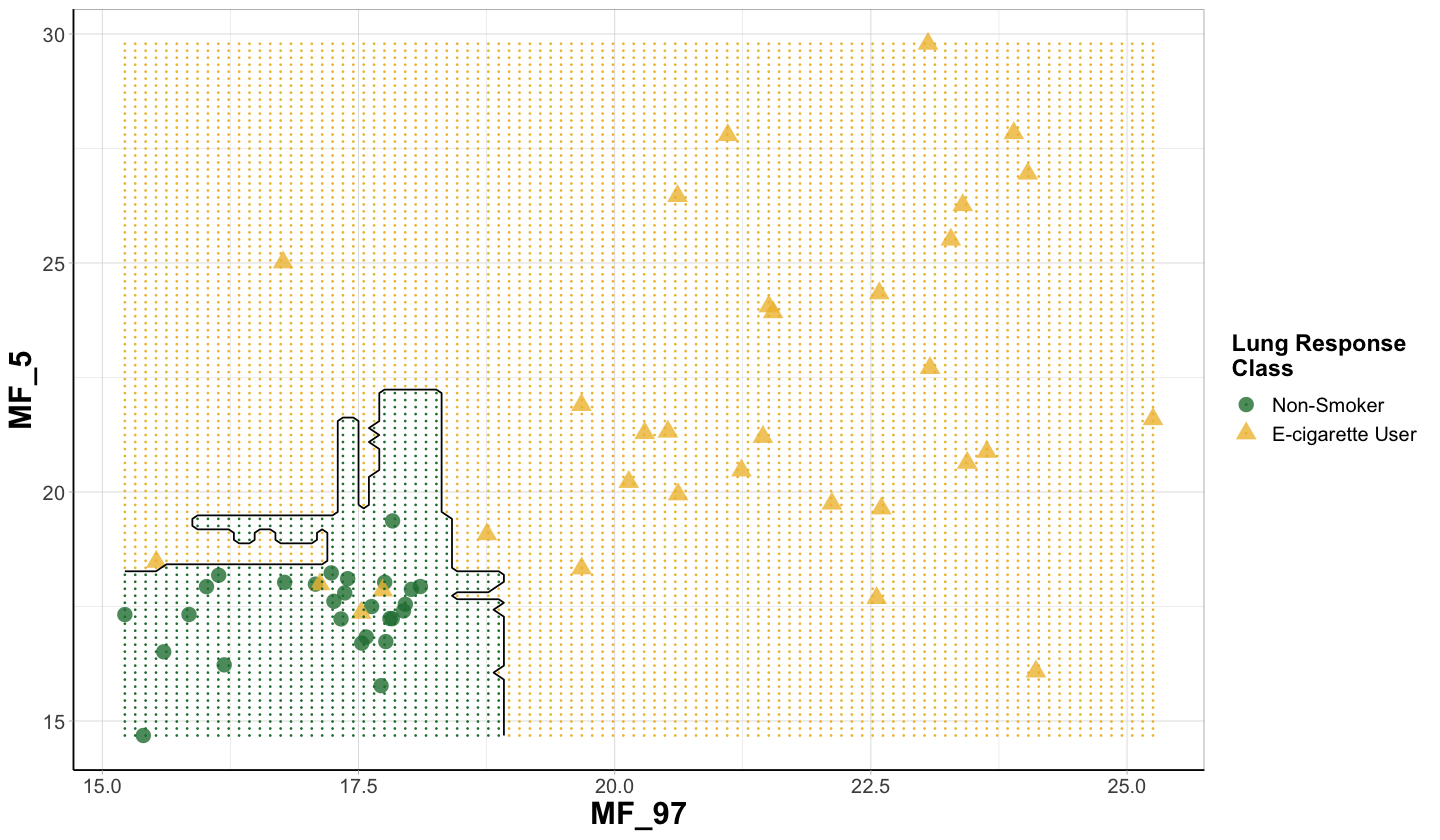

In [16]:
options(repr.plot.width=12, repr.plot.height=7) #changing size

#choosing palette from package
metbrewer_colors = MetPalettes$Lakota[[1]]

ggplot() +
  geom_point(data = df1, aes(x = MF_97, y = MF_5, color = Smoking_Status, shape = Smoking_Status),
            size = 4, alpha = 0.8) + 
  geom_contour(data = grid_df1, aes(x = MF_97, y = MF_5, z = as.numeric(Pred_Class == "1")), color = "black", 
               breaks = 0.5) + #adds contour line
  geom_point(data = grid_df1, aes(x = MF_97, y = MF_5, color = Pred_Class), size = 0.1) + #shades plot

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'MF_97', y = 'MF_5') + #changing axis labels 

  scale_color_manual(name = "Lung Response \nClass",
                      values = c(metbrewer_colors[5], metbrewer_colors[2]),
                      labels = c('Non-Smoker','E-cigarette User')) + #reordering
  scale_shape_manual(name = "Lung Response \nClass",
                     values = c(16,17),
                     labels = c('Non-Smoker','E-cigarette User'))

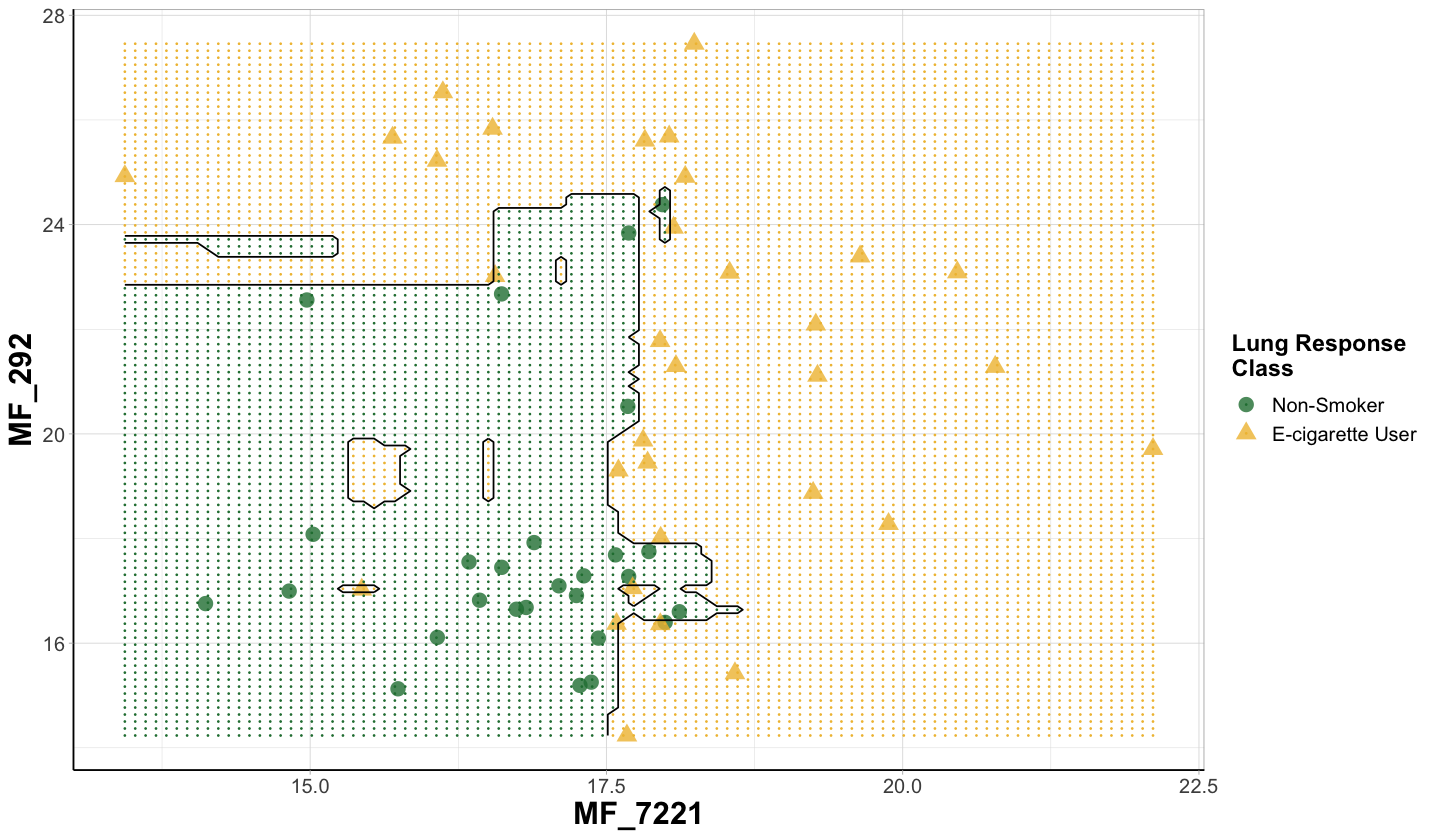

In [18]:
ggplot() +
  geom_point(data = df2, aes(x = MF_7221, y = MF_292, color = Smoking_Status, shape = Smoking_Status),
            size = 4, alpha = 0.8) + 
  geom_contour(data = grid_df2, aes(x = MF_7221, y = MF_292, z = as.numeric(Pred_Class == "1")), color = "black", 
               breaks = 0.5) + #adds contour line
  geom_point(data = grid_df2, aes(x = MF_7221, y = MF_292, color = Pred_Class), size = 0.1) + #shades plot

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'MF_7221', y = 'MF_292') + #changing axis labels 

  scale_color_manual(name = "Lung Response \nClass",
                      values = c(metbrewer_colors[5], metbrewer_colors[2]),
                      labels = c('Non-Smoker','E-cigarette User')) + #reordering
  scale_shape_manual(name = "Lung Response \nClass",
                     values = c(16,17),
                     labels = c('Non-Smoker','E-cigarette User'))